In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns

In [2]:
data = pd.read_csv('drive/My Drive/bank-full.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
data.shape

(45211, 17)

In [4]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
data['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [8]:
data['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [9]:
data['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [10]:
data['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [11]:
data['job'] = le.fit_transform(data['job'])
data['marital'] = le.fit_transform(data['marital'])
data['education'] = le.fit_transform(data['education'])
data['default'] = le.fit_transform(data['default'])
data['housing'] = le.fit_transform(data['housing'])
data['loan'] = le.fit_transform(data['loan'])
data['contact'] = le.fit_transform(data['contact'])
data['month'] = le.fit_transform(data['month'])
data['poutcome'] = le.fit_transform(data['poutcome'])
data['y'] = le.fit_transform(data['y'])
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


看資料是否有outliers

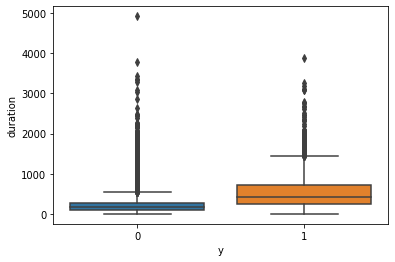

In [12]:
sns.boxplot(x='y', y='duration', data=data)

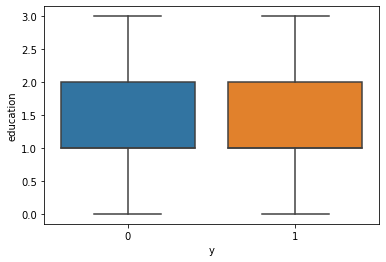

In [13]:
sns.boxplot(x='y', y='education', data=data)

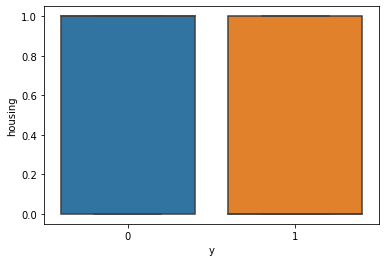

In [14]:
sns.boxplot(x='y', y='housing', data=data)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


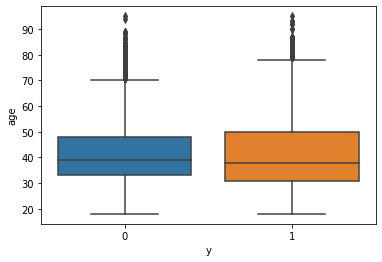

In [15]:
sns.boxplot(data['y'],data['age'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


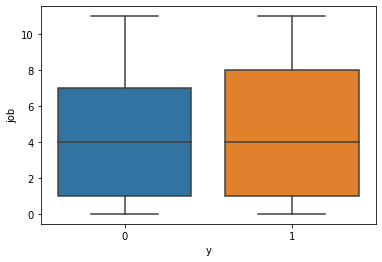

In [16]:
sns.boxplot(data['y'],data['job'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


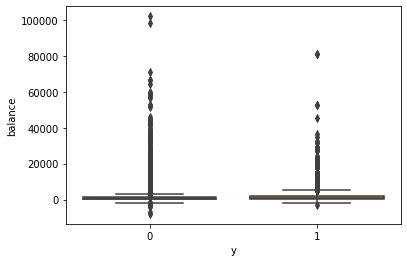

In [17]:
sns.boxplot(data['y'], y='balance', data=data)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


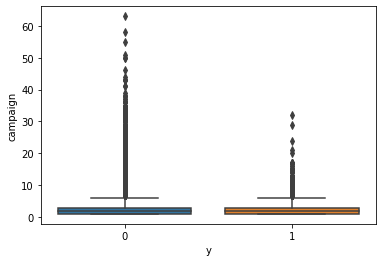

In [18]:
sns.boxplot(data['y'],data['campaign'])

In [19]:
def remove_outliers(df, column , minimum, maximum):
    col_values = df[column].values
    df[column] = np.where(np.logical_or(col_values<minimum, col_values>maximum), col_values.mean(), col_values)
    return df

In [20]:
min_val = data["duration"].min()
max_val = 1500
data = remove_outliers(df=data, column='duration' , minimum=min_val, maximum=max_val)

min_val = data["age"].min()
max_val = 80
data = remove_outliers(df=data, column='age' , minimum=min_val, maximum=max_val)

min_val = data["campaign"].min()
max_val = 6
data = remove_outliers(df=data, column='campaign' , minimum=min_val, maximum=max_val)

min_val = data["balance"].min()
max_val = 20000
data = remove_outliers(df=data, column='balance' , minimum=min_val, maximum=max_val)

In [21]:
Y = data['y'].values

In [22]:
Y

array([0, 0, 0, ..., 1, 0, 0])

In [23]:
X = data.drop('y', 1)

In [24]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58.0,4,1,2,0,2143.0,1,0,2,5,8,261.0,1.0,-1,0,3
1,44.0,9,2,1,0,29.0,1,0,2,5,8,151.0,1.0,-1,0,3
2,33.0,2,1,1,0,2.0,1,1,2,5,8,76.0,1.0,-1,0,3
3,47.0,1,1,3,0,1506.0,1,0,2,5,8,92.0,1.0,-1,0,3
4,33.0,11,2,3,0,1.0,0,0,2,5,8,198.0,1.0,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,9,1,2,0,825.0,0,0,0,17,9,977.0,3.0,-1,0,3
45207,71.0,5,0,0,0,1729.0,0,0,0,17,9,456.0,2.0,-1,0,3
45208,72.0,5,1,1,0,5715.0,0,0,0,17,9,1127.0,5.0,184,3,2
45209,57.0,1,1,1,0,668.0,0,0,1,17,9,508.0,4.0,-1,0,3


In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.fit_transform(X)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [28]:
pca = PCA(n_components=10)
pca.fit(X)
X = pca.fit_transform(X)

In [29]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1234)
#lr = LinearRegression(normalize=True)

In [30]:
X_train.shape

(36168, 10)

SVM

In [31]:
from sklearn.svm import SVC
import multiprocessing
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection

In [32]:
kfold = model_selection.KFold(n_splits=10, random_state=1000)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [33]:
SVC = SVC(C=0.01, kernel='linear')

In [34]:
result = model_selection.cross_val_score(SVC, X_train, Y_train, cv=kfold, scoring='accuracy')

In [35]:
result.mean()

0.8827138118056082

NN

In [36]:
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [37]:
model = Sequential() 
model.add(Dense(50, activation='tanh',input_shape=(10,)))
model.add(Dense(30, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#model.fit(X_train, Y_train, epochs=20, batch_size=10)
#scores = model.evaluate(X_test, Y_test)

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                550       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 2,111
Trainable params: 2,111
Non-trainable params: 0
_________________________________________________________________


In [39]:
X_test.shape

(9043, 10)

In [40]:
model.fit(X_train, Y_train, epochs=30, batch_size=10)

Epoch 1/20
3617/3617 [==============================] - 4s 1ms/step - loss: 0.2711 - accuracy: 0.8889
Epoch 2/20
3617/3617 [==============================] - 4s 1ms/step - loss: 0.2578 - accuracy: 0.8904
Epoch 3/20
3617/3617 [==============================] - 5s 1ms/step - loss: 0.2523 - accuracy: 0.8931
Epoch 4/20
3617/3617 [==============================] - 4s 1ms/step - loss: 0.2482 - accuracy: 0.8947
Epoch 5/20
3617/3617 [==============================] - 4s 1ms/step - loss: 0.2453 - accuracy: 0.8959
Epoch 6/20
3617/3617 [==============================] - 4s 1ms/step - loss: 0.2433 - accuracy: 0.8958
Epoch 7/20
3617/3617 [==============================] - 4s 1ms/step - loss: 0.2420 - accuracy: 0.8961
Epoch 8/20
3617/3617 [==============================] - 4s 1ms/step - loss: 0.2407 - accuracy: 0.8961
Epoch 9/20
3617/3617 [==============================] - 5s 1ms/step - loss: 0.2396 - accuracy: 0.8966
Epoch 10/20
3617/3617 [==============================] - 4s 1ms/step - loss: 0.238

In [45]:
test_los, test_acc = model.evaluate(X_test, Y_test)

283/283 [==============================] - 0s 860us/step - loss: 0.2442 - accuracy: 0.8963


NN2Logistic

In [46]:
model1 = Sequential() 
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#model.fit(X_train, Y_train, epochs=20, batch_size=10)
#scores = model.evaluate(X_test, Y_test)

In [47]:
model1.fit(X_train, Y_train, epochs=20, batch_size=10)
scores1 = model1.evaluate(X_test, Y_test)

Epoch 1/20
3617/3617 [==============================] - 3s 828us/step - loss: 0.4228 - accuracy: 0.8258
Epoch 2/20
3617/3617 [==============================] - 3s 822us/step - loss: 0.2805 - accuracy: 0.8882
Epoch 3/20
3617/3617 [==============================] - 3s 808us/step - loss: 0.2769 - accuracy: 0.8878
Epoch 4/20
3617/3617 [==============================] - 3s 819us/step - loss: 0.2768 - accuracy: 0.8881
Epoch 5/20
3617/3617 [==============================] - 3s 826us/step - loss: 0.2766 - accuracy: 0.8881
Epoch 6/20
3617/3617 [==============================] - 3s 823us/step - loss: 0.2768 - accuracy: 0.8877
Epoch 7/20
3617/3617 [==============================] - 3s 915us/step - loss: 0.2767 - accuracy: 0.8878
Epoch 8/20
3617/3617 [==============================] - 4s 988us/step - loss: 0.2768 - accuracy: 0.8879
Epoch 9/20
3617/3617 [==============================] - 3s 848us/step - loss: 0.2767 - accuracy: 0.8881
Epoch 10/20
3617/3617 [==============================] - 3s 834u

In [44]:
scores1

[0.27387624979019165, 0.8890854716300964]